In [1]:
import os
import angr


filePath = '/home/nahid/reverse/binaries/malwares/2d.exe'
proj = angr.Project(filePath)





In [2]:
import monkeyhex # this will format numerical results in hexadecimal

print(proj.arch)

print(proj.entry)

print(proj.filename)

<Arch X86 (LE)>
4198836
/home/nahid/reverse/binaries/malwares/2d.exe


In [3]:
print(proj.loader,'\n\n')

print("Shared Objects:")
for so in (proj.loader.shared_objects):
    print(so)
print()
    
    
    
print('min_addr',proj.loader.min_addr)

print('max_addr',proj.loader.max_addr)


print('main_object',proj.loader.main_object)  # we've loaded several binaries into this project. Here's the main one!


print('does this binary have an executable stack?: ',proj.loader.main_object.execstack)  # sample query: does this binary have an executable stack?

print('is this binary position-independent?',proj.loader.main_object.pic)  # sample query: is this binary position-independent?



<Loaded 2d.exe, maps [0x400000:0x7013ff]> 


Shared Objects:
extern-address space
cle##tls

min_addr 4194304
max_addr 7345151
main_object <PE Object 2d.exe, maps [0x400000:0x425d63]>
does this binary have an executable stack?:  False
is this binary position-independent? False


PLT stub 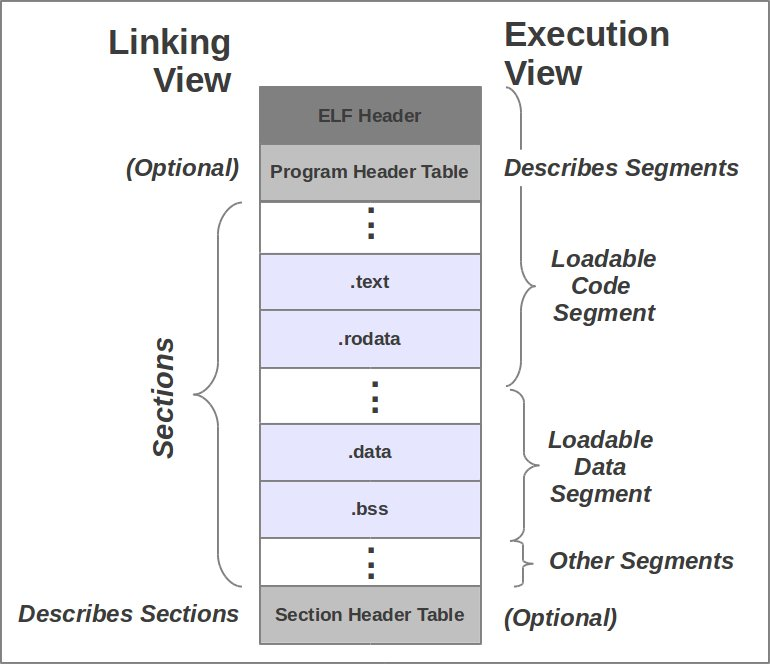

In [4]:
obj = proj.loader.main_object


print('# The entry point of the object',obj.entry)




print("Retrieve this ELF's segments and sections")

for segment in obj.segments:
    print('segment regions : ',segment)
print('\n\n')



for section in obj.sections:
    print("Section Regions: ",section)

            
# # You can get an individual segment or section by an address it contains:
print(" You can get an individual segment  by an address it contains:")
print('find_segment_containing(obj.entry)',obj.find_segment_containing(obj.entry))



print('\n')
print(" You can get an individual section by an address it contains:")

print("obj.find_section_containing(obj.entry)",obj.find_section_containing(obj.entry))



# # Get the address of the PLT stub for a symbol
# >>> addr = obj.plt['strcmp']
# >>> addr
# 0x400550
# >>> obj.reverse_plt[addr]
# 'strcmp'

# # Show the prelinked base of the object and the location it was actually mapped into memory by CLE
# >>> obj.linked_base
# 0x400000
# >>> obj.mapped_base
# 0x400000

# The entry point of the object 4198836
Retrieve this ELF's segments and sections
segment regions :  <.text    | offset 0x1000, vaddr 0x401000, size 0x6ecc>
segment regions :  <.data    | offset 0x0, vaddr 0x408000, size 0xf40>
segment regions :  <.rsrc    | offset 0x8000, vaddr 0x409000, size 0x1cd64>



Section Regions:  <.text    | offset 0x1000, vaddr 0x401000, size 0x6ecc>
Section Regions:  <.data    | offset 0x0, vaddr 0x408000, size 0xf40>
Section Regions:  <.rsrc    | offset 0x8000, vaddr 0x409000, size 0x1cd64>
 You can get an individual segment  by an address it contains:
find_segment_containing(obj.entry) <.text    | offset 0x1000, vaddr 0x401000, size 0x6ecc>


 You can get an individual section by an address it contains:
obj.find_section_containing(obj.entry) <.text    | offset 0x1000, vaddr 0x401000, size 0x6ecc>


In [5]:
import os
        
fh = open(filePath, 'rb')
bin_bytearray = bytearray(fh.read())


In [6]:
bin_bytearray[0:10]
print(len(bin_bytearray))

151552


In [7]:
code_section = obj.find_section_containing(obj.entry)

# offset = code_section.split("|")[1].split(',')[0].split()[1]

In [8]:
#capstone github code

from capstone import *

# CODE = b"\x55\x48\x8b\x05\xb8\x13\x00\x00"
# from pprint import pprint
# pprint(vars(code_section))
print(code_section.offset , code_section.filesize)
textSectionStart = code_section.offset #int(code_section.offset,0)
textSectionLen =  code_section.filesize#int(code_section.filesize,0)


CODE = bin_bytearray[textSectionStart:(textSectionStart+textSectionLen)]

print(len(CODE))
md = Cs(CS_ARCH_X86, CS_MODE_64)
count = 0
for i in md.disasm(CODE, code_section.offset):
    print("0x%x:\t%s\t%s" %(i.address, i.mnemonic, i.op_str))  
    count+=1
print(count)


4096 28672
28672
0x1000:	int3	
0x1002:	movabs	eax, dword ptr [0xa20fc272a20e9372]
0x100b:	jb	0x1075
0x100d:	cmp	esp, dword ptr [rdx + rsi*2 + 0x72a275a0]
0x1014:	add	dword ptr [rsi - 0x5e], esi
0x1017:	jb	0x1044
0x1019:	movabs	dword ptr fs:[0xa12b0f72a127db72], eax
0x1023:	jb	0x105e
0x1025:	xlatb	
0x1026:	movabs	eax, dword ptr [0xa1d13272a1cd0572]
0x102f:	jb	0x1097
0x1031:	pop	rsi
0x1032:	movabs	dword ptr [0xa0e0f772a364a272], eax
0x103b:	jb	0x1077
0x103d:	movabs	dword ptr gs:[0xa3645f72a364ee72], eax
0x1047:	jb	0x1098
16
